# Bài ôn tập buổi 9: Titanic
#### Xem xét việc một hành khách có sống sót hay không dựa trên bộ dữ liệu titanic (train.csv có 891 mẫu và test.csv có 418 mẫu )
### Yêu cầu: Hãy đọc dữ liệu từ các tập tin này, áp dụng Logistic Regression để thực hiện việc xác định một hành khách có sống sót hay không dựa trên những thông tin được cung cấp.
1. Đọc dữ liệu train.csv, tiền xử lý dữ liệu nếu cần.
2. Tạo train dataset và test dataset từ dữ liệu ở câu 1 với tỷ lệ dữ liệu test là 0.2
3. Áp dụng thuật toán Logistic Regression: xây dựng model, đánh giá model. 
4. Đọc dữ liệu test.csv. Tiền xử lý dữ liệu như train.csv. Tìm kết quả cho dữ liệu test.
5. Ghi kết quả dự đoán từ test vào file test_pred.csv


In [1]:
library(corrplot)
library(Amelia)
library(caret)

corrplot 0.84 loaded

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: lattice

Loading required package: ggplot2



In [2]:
data = read.csv('../Data/titanic/train.csv')

In [3]:
head(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
tail(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [5]:
summary(data)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [6]:
str(data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [7]:
print(paste("cols:", ncol(data)))
print(paste("rows:", nrow(data)))

[1] "cols: 12"
[1] "rows: 891"


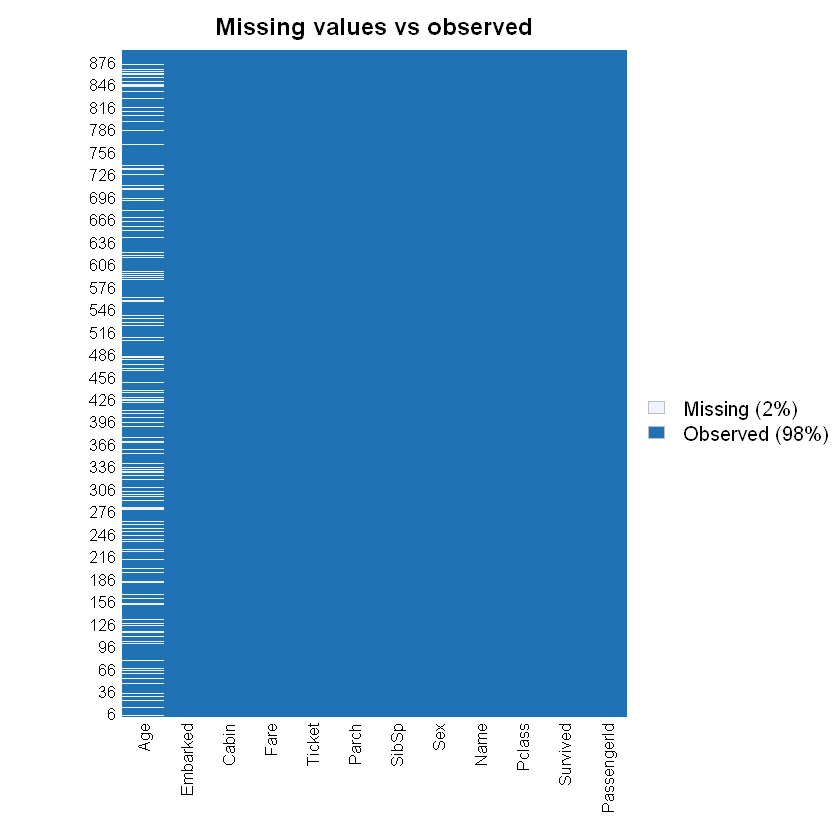

In [8]:
# Check missing value
missmap(data, main = "Missing values vs observed")

In [9]:
# Drop NA
print(paste("Before drop:", nrow(data)))
data = na.omit(data)
print(paste("After drop", nrow(data)))

[1] "Before drop: 891"
[1] "After drop 714"


In [10]:
# Convert to factor
class_factors = c('Pclass', 'Sex', 'Cabin')
data[class_factors] = lapply(data[class_factors], factor)

In [11]:
for (factor in class_factors){
    print(factor)
    print(paste("Level in factor:", toString(levels(data[, factor]))))
    print(paste("Number of levels in factor:", nlevels(data[, factor])))
}


[1] "Pclass"
[1] "Level in factor: 1, 2, 3"
[1] "Number of levels in factor: 3"
[1] "Sex"
[1] "Level in factor: female, male"
[1] "Number of levels in factor: 2"
[1] "Cabin"
[1] "Level in factor: , A10, A16, A20, A23, A24, A26, A31, A34, A36, A5, A6, A7, B101, B18, B19, B20, B22, B28, B3, B30, B35, B37, B38, B39, B4, B41, B42, B49, B5, B50, B51 B53 B55, B57 B59 B63 B66, B58 B60, B69, B71, B73, B77, B79, B80, B82 B84, B86, B94, B96 B98, C101, C103, C104, C110, C111, C118, C123, C124, C125, C126, C148, C2, C22 C26, C23 C25 C27, C30, C32, C45, C46, C49, C50, C52, C54, C62 C64, C65, C68, C7, C70, C78, C82, C83, C85, C86, C87, C90, C91, C92, C93, C99, D, D10 D12, D11, D15, D17, D19, D20, D26, D28, D30, D33, D35, D36, D37, D46, D47, D48, D49, D50, D56, D6, D7, D9, E10, E101, E12, E121, E17, E24, E25, E31, E33, E34, E36, E38, E40, E44, E46, E49, E50, E58, E63, E67, E68, E77, E8, F G63, F G73, F2, F33, F4, G6, T"
[1] "Number of levels in factor: 135"


In [12]:
input_cols = c("Sex", "Pclass", "Age", "Survived")
input_data = data[, input_cols]